## Comment utiliser ce notebook
Cliquer sur une cellule et presser Entrée pour éditer une cellule.<br/>
Appuyer sur Shift+Entrée pour exécuter la cellule.<br/>
Pour répondre à un exercice, remplacer le bloc
```python
# DEBUT : à modifier par l'étudiant
pass
# FIN : à modifier par l'étudiant
```
par votre code et exécuter la cellule.
<hr/>

Sous-sections :
[Notion de flux](#flux)&nbsp;
[Lire depuis un fichier](#fichier)&nbsp;
[Lire depuis la console](#console)&nbsp;
[Les flux toujours ouverts](#flux_ouverts)&nbsp;
[Le format CSV](#csv)&nbsp;
[La fonction print](#print)&nbsp;

## Entrées Sorties

Pour manipuler des données avec Python, il est souvent nécessaire de pouvoir lire le contenu d'un fichier dans lequel ces données sont stockées sur disque.

Par exemple, le fichier iris.data est un fichier texte qui contient des informations sur 150 exemplaires de fleurs, réparties en trois classes. 

Voici une représentation en 2 dimensions de ces données :

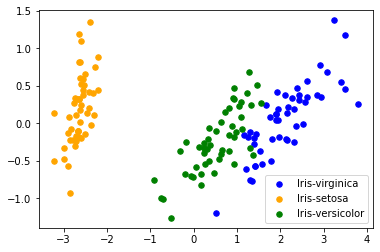

In [28]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA

colors = ['blue', 'orange', 'green']
classes = ['Iris-virginica', 'Iris-setosa', 'Iris-versicolor']
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
df = pd.read_csv("data/iris.data", sep=',', header=None, names=features + ['class'])
data = df[features].values
targets = df['class'].values
pca = PCA(n_components=2)
x = pca.fit(data).transform(data)[:, 0]
y = pca.fit(data).transform(data)[:, 1]
for k in range(len(classes)):
    plt.scatter(x[targets == classes[k]], y[targets ==
                    classes[k]], s=30, marker='o', color=colors[k], label=classes[k])
plt.legend()
plt.show()

Pour pouvoir exploiter ces données, il est nécessaire de pouvoir ouvrir le fichier depuis le programme Python, et d'y récupérer les données qui nous intéressent.

<a id="flux"></a>
### Notion de flux d'entrée/sortie

Pour lire le contenu d'un fichier, on ouvre un *flux* vers ce fichier, qui sert de "canal de communication" entre le programme Python et le fichier.

Ouvrir un flux en Python se fait en appelant la fonction open.

Dans l'exemple suivant, on ouvre le flux f en lecture (r) pour lire depuis le fichier iris.data qui est situé dans le sous-répertoire data, avec l'instruction :
```Python
f = open('data/iris.data','r')
```
puis on lit le contenu du fichier 

```Python
f.read()
```
et enfin, on ferme le flux 

```Python
f.close()
```
L'option 'r' donnée à la fonction open signifie qu'on veut ouvrir le fichier en lecture.
D'autres options peuvent être données à la fonction open si l'on veut ouvrir le fichier en écriture (w), en écriture à la suite sans effacer le contenu actuel du fichier (a), en mode binaire (b), etc.

<table>
    <tr>
        <td><b>r</b></td><td>Ouverture en lecture</td>
    </tr>
    <tr>
        <td><b>w</b></td><td>Ouverture en écriture</td>
    </tr>
    <tr>
        <td><b>x</b></td><td>Écriture avec création exclusive (échoue si le fichier existe)</td>
    </tr>
    <tr>
        <td><b>a</b></td><td>Écriture à la suite (sans écraser ce qu’il y a dans le fichier)</td>
    </tr>
    <tr>
        <td><b>t</b></td><td>Mode textuel (défaut)</td>
     </tr>
     <tr>
        <td><b>b</b></td><td>Mode binaire</td>
     </tr>
    <tr>
        <td><b>+</b></td><td>Lecture et écriture</td>
    </tr>
</table>



<a id="fichier"></a>
### Lire depuis un fichier

Pour lire depuis un fichier, on ouvre un flux et on utilise soit la fonction **read** (pour lire tout le contenu du fichier), la fonction **readline** (qui renvoie la ligne suivante), ou la fonction **readlines** (qui renvoie une liste de lignes).

L'exemple suivant lit le contenu du fichier iris.data et l'affiche sur la sortie standard :

In [4]:
f = open('data/iris.data','r')
print(f.read())
f.close()

5.1,3.5,1.4,0.2,Iris-setosa
4.9,3.0,1.4,0.2,Iris-setosa
4.7,3.2,1.3,0.2,Iris-setosa
4.6,3.1,1.5,0.2,Iris-setosa
5.0,3.6,1.4,0.2,Iris-setosa
5.4,3.9,1.7,0.4,Iris-setosa
4.6,3.4,1.4,0.3,Iris-setosa
5.0,3.4,1.5,0.2,Iris-setosa
4.4,2.9,1.4,0.2,Iris-setosa
4.9,3.1,1.5,0.1,Iris-setosa
5.4,3.7,1.5,0.2,Iris-setosa
4.8,3.4,1.6,0.2,Iris-setosa
4.8,3.0,1.4,0.1,Iris-setosa
4.3,3.0,1.1,0.1,Iris-setosa
5.8,4.0,1.2,0.2,Iris-setosa
5.7,4.4,1.5,0.4,Iris-setosa
5.4,3.9,1.3,0.4,Iris-setosa
5.1,3.5,1.4,0.3,Iris-setosa
5.7,3.8,1.7,0.3,Iris-setosa
5.1,3.8,1.5,0.3,Iris-setosa
5.4,3.4,1.7,0.2,Iris-setosa
5.1,3.7,1.5,0.4,Iris-setosa
4.6,3.6,1.0,0.2,Iris-setosa
5.1,3.3,1.7,0.5,Iris-setosa
4.8,3.4,1.9,0.2,Iris-setosa
5.0,3.0,1.6,0.2,Iris-setosa
5.0,3.4,1.6,0.4,Iris-setosa
5.2,3.5,1.5,0.2,Iris-setosa
5.2,3.4,1.4,0.2,Iris-setosa
4.7,3.2,1.6,0.2,Iris-setosa
4.8,3.1,1.6,0.2,Iris-setosa
5.4,3.4,1.5,0.4,Iris-setosa
5.2,4.1,1.5,0.1,Iris-setosa
5.5,4.2,1.4,0.2,Iris-setosa
4.9,3.1,1.5,0.1,Iris-setosa
5.0,3.2,1.2,0.2,Iris

Pour éviter d'avoir à fermer explicitement un flux, on peut utiliser la syntaxe suivante, qui ferme automatiquement le flux f lorsque l'exécution du bloc d'instructions est terminé :
```Python
with open('data/iris.data','r') as f:
    print(f.read())
```

L'exemple suivant lit les 5 premières lignes du fichier iris.data et mes affichent sur la sortie standard :

In [29]:
with open('data/iris.data','r') as f:
    i=0
    while i<5:
        line = f.readline()
        print(line, end='')
        i = i+1

5.1,3.5,1.4,0.2,Iris-setosa
4.9,3.0,1.4,0.2,Iris-setosa
4.7,3.2,1.3,0.2,Iris-setosa
4.6,3.1,1.5,0.2,Iris-setosa
5.0,3.6,1.4,0.2,Iris-setosa


Dans cet exemple, on a utilisé la syntaxe 
```Python
print(line, end='')
```
qui demande à la fonction print de ne pas rajouter de caractère \n (retour à la ligne) à la fin de l'affichage, car les lignes lues incluent déjà le caractère \n, comme le montre l'exemple suivant :

In [1]:
with open('data/iris.data','r') as f:
    i=0
    while i<5:
        line = f.readline()
        caracteres = [c for c in line]
        print(caracteres)
        i = i+1

['5', '.', '1', ',', '3', '.', '5', ',', '1', '.', '4', ',', '0', '.', '2', ',', 'I', 'r', 'i', 's', '-', 's', 'e', 't', 'o', 's', 'a', '\n']
['4', '.', '9', ',', '3', '.', '0', ',', '1', '.', '4', ',', '0', '.', '2', ',', 'I', 'r', 'i', 's', '-', 's', 'e', 't', 'o', 's', 'a', '\n']
['4', '.', '7', ',', '3', '.', '2', ',', '1', '.', '3', ',', '0', '.', '2', ',', 'I', 'r', 'i', 's', '-', 's', 'e', 't', 'o', 's', 'a', '\n']
['4', '.', '6', ',', '3', '.', '1', ',', '1', '.', '5', ',', '0', '.', '2', ',', 'I', 'r', 'i', 's', '-', 's', 'e', 't', 'o', 's', 'a', '\n']
['5', '.', '0', ',', '3', '.', '6', ',', '1', '.', '4', ',', '0', '.', '2', ',', 'I', 'r', 'i', 's', '-', 's', 'e', 't', 'o', 's', 'a', '\n']


L'exemple suivant affiche la $5^e$ ligne du fichier iris.data :

In [3]:
f = open('data/iris.data','r')
lines= f.readlines()
print(lines[4])
f.close()

5.0,3.6,1.4,0.2,Iris-setosa



Pour lire un fichier ligne à ligne, on utilise une boucle for, comme dans l'exemple suivant :

In [18]:
with open('data/iris.data','r') as f:
    for line in f:
        if 'Iris-setosa' in line:
            print(line.strip())

5.1,3.5,1.4,0.2,Iris-setosa
4.9,3.0,1.4,0.2,Iris-setosa
4.7,3.2,1.3,0.2,Iris-setosa
4.6,3.1,1.5,0.2,Iris-setosa
5.0,3.6,1.4,0.2,Iris-setosa
5.4,3.9,1.7,0.4,Iris-setosa
4.6,3.4,1.4,0.3,Iris-setosa
5.0,3.4,1.5,0.2,Iris-setosa
4.4,2.9,1.4,0.2,Iris-setosa
4.9,3.1,1.5,0.1,Iris-setosa
5.4,3.7,1.5,0.2,Iris-setosa
4.8,3.4,1.6,0.2,Iris-setosa
4.8,3.0,1.4,0.1,Iris-setosa
4.3,3.0,1.1,0.1,Iris-setosa
5.8,4.0,1.2,0.2,Iris-setosa
5.7,4.4,1.5,0.4,Iris-setosa
5.4,3.9,1.3,0.4,Iris-setosa
5.1,3.5,1.4,0.3,Iris-setosa
5.7,3.8,1.7,0.3,Iris-setosa
5.1,3.8,1.5,0.3,Iris-setosa
5.4,3.4,1.7,0.2,Iris-setosa
5.1,3.7,1.5,0.4,Iris-setosa
4.6,3.6,1.0,0.2,Iris-setosa
5.1,3.3,1.7,0.5,Iris-setosa
4.8,3.4,1.9,0.2,Iris-setosa
5.0,3.0,1.6,0.2,Iris-setosa
5.0,3.4,1.6,0.4,Iris-setosa
5.2,3.5,1.5,0.2,Iris-setosa
5.2,3.4,1.4,0.2,Iris-setosa
4.7,3.2,1.6,0.2,Iris-setosa
4.8,3.1,1.6,0.2,Iris-setosa
5.4,3.4,1.5,0.4,Iris-setosa
5.2,4.1,1.5,0.1,Iris-setosa
5.5,4.2,1.4,0.2,Iris-setosa
4.9,3.1,1.5,0.1,Iris-setosa
5.0,3.2,1.2,0.2,Iris

<div class="alert alert-block alert-success">
    <b>Exercice.</b>
    Ouvrir le fichier ri13 situé dans le sous-répertoire data et afficher les 18 premiers caractères de la séquence qu'il contient.
</div>

In [ ]:
# DEBUT : à modifier par l'étudiant
pass
# FIN : à modifier par l'étudiant

<div class="alert alert-block alert-success">
    <b>Exercice.</b>
    Ecrire un programme qui ouvre le fichier iris.data et place dans la variable n le nombre de caractères contenus dans le fichier.
</div>

In [14]:
# DEBUT : à modifier par l'étudiant
# n = ...
pass
# FIN : à modifier par l'étudiant

# --------- tests -------- #
try:
    assert n==4550, 'Erreur : valeur de n incorrecte.'
    print(f'Le fichier iris.data contient {n} caractères')
except AssertionError as e:
    print(e)   

Erreur : valeur de n incorrecte.


<div class="alert alert-block alert-success">
    <b>Exercice.</b>
    Ecrire un programme qui ouvre le fichier iris.data et place dans la variable n le nombre de lignes du fichier.
</div>

In [15]:
# DEBUT : à modifier par l'étudiant
# n = ...
pass
# FIN : à modifier par l'étudiant

# --------- tests -------- #
try:
    assert n==150, 'Erreur : valeur de n incorrecte.'
    print(f'Le fichier iris.data contient {n} lignes')
except AssertionError as e:
    print(e)   

Erreur : valeur de n incorrecte.


<div class="alert alert-block alert-success">
    <b>Exercice.</b>
    Ecrire un programme qui ouvre le fichier iris.data et compte dans combien de lignes apparaît la chaîne de caractères "Iris-versicolor".
</div>

In [22]:
nb_versicolor=0
# DEBUT : à modifier par l'étudiant
pass
# FIN : à modifier par l'étudiant

# --------- tests -------- #
try:
    assert nb_versicolor==50, 'Erreur : valeur de nb_versicolor incorrecte.'
    print(f'La chaîne de caractères Iris-versicolor apparaît {nb_versicolor} fois dans le fichier iris.data. ')
except AssertionError as e:
    print(e)               


Erreur : valeur de nb_versicolor incorrecte.


<div class="alert alert-block alert-success">
    <b>Exercice.</b>
    Ouvrir le fichier ri13 situé dans le sous-répertoire data et compter le nombre de A qu'il contient. Placer le résultat dans la variable nb_A.
</div>

In [ ]:
nb_A = 0
# DEBUT : à modifier par l'étudiant
pass
# FIN : à modifier par l'étudiant


# --------- tests -------- #
try:
    assert nb_A==745, 'Erreur : nombre de A incorrect.'
    print(f'Le fichier data/ri13 contient {nb_A} fois le caractère A.')
    print("Ok")
except AssertionError as e:
    print(e)   

<a id="console"></a>
### Lire depuis la console

Pour lire depuis l'entrée standard, on utilise la fonction input, comme dans l'exemple suivant :

In [ ]:
age = int(input('Quel est votre age ? '))
print(f'Vous avez {age} ans.')

<div class="alert alert-block alert-success">
    <b>Exercice.</b>
    Ecrire un programme qui demande à l'utilisateur de saisir un nombre réel entre 1 et 1000. 
    Ce nombre sera stocké dans la variable r et utilisé pour afficher un cercle ayant ce rayon.
</div>

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

# DEBUT : à modifier par l'étudiant
# r = ...
pass
# FIN : à modifier par l'étudiant

# --------- tests -------- #
try:
    assert r is not None, 'Erreur : la valeur de la variable r doit être non nulle.'
    assert r>=0, 'Erreur : le rayon doit être >=1.'
    assert r<=2000, 'Erreur : le rayon doit être <=2000.'
    assert type(r) is float, 'Erreur : le rayon doit être un nombre réel.'
    print("Ok")
    w=2000
    fig, ax = plt.subplots(1) 
    ax.set_xlim((0, w))
    ax.set_ylim((0, w))
    plt.gca().set_aspect('equal', adjustable='box')
    circle = Circle((w/2, w/2), r, color='b', fill=False,clip_on=False)
    ax.add_patch(circle)
    ax.annotate(r'$r$', (w/2+r/2,w/2+1),fontsize=14,color='b')
    plt.plot((w/2,w/2+r),(w/2,w/2))
    plt.show()
except AssertionError as e:
    print(e)   

<a id="flux_ouverts"></a>
### Les flux toujours ouverts

Trois flux sont toujours ouverts, et peuvent être utilisés directement :
- la **sortie standard** sys.stdout, qui affiche sur la console.

    Pour écrire sur la sortie standard, on peut utiliser la fonction write, comme ici :
   ```python
    import sys
    sys.stdout.write('quelque chose')
    ``` 
    ou utiliser plus simplement la fonction print, qui écrit par défaut sur la sortie standard :
    ```python
    print('quelque chose')
    ``` 
- la **sortie erreurs** sys.stderr, qui affiche habituellement sur la console, mais peut au besoin être redirigé vers un fichier.

    Pour écrire sur la sortie erreurs, on peut utiliser la fonction write, comme ici :
   ```python
    import sys
    sys.stderr.write('une erreur')
    ``` 
    ou utiliser la fonction print, comme ceci :
    ```python
    import sys
    print('une erreur',file=sys.stderr)
    ``` 

- l'**entrée standard** sys.stdin, qui est utilisée pour lire depuis la console.


<div class="alert alert-block alert-success">
    <b>Exercice.</b>
    Ecrire un programme qui parcourt la liste notes et affiche les nombres entre 0 et 20 sur la sortie standard et les autres sur la sortie erreurs.
</div>

In [ ]:
import sys
notes = [12,4,-1,29,-2,3,7,18,21]
# DEBUT : à modifier par l'étudiant
pass
# FIN : à modifier par l'étudiant

<a id="csv"></a>
### Le format CSV

Le fichier iris.data contient une table stockée dans un fichier texte au format CSV.

Le format CSV (pour *Comma-Separated Values*) est un format de fichier qui permet de stocker des données tabulaires dans des fichiers textes. Chaque ligne de la table est stockée sous forme d'une nouvelle ligne de texte, et sur une même ligne les valeurs de chacune des colonnes sont séparées par un séparateur.

Dans le fichier iris.data, le séparateur est la virgule (,), mais d'autres séparateurs peuvent être utilisés, comme le point virgule, l'espace, la tabulation, etc. 
Donc pour lire correctement les données d'un fichier CSV, il faut d'abord bien regarder quel séparateur a été utilisé pour séparer les valeurs !

Le programme suivant utilise le module csv natif de Python pour lire les données du fichier iris.data, et affiche la table avec des valeurs centrées dans des colonnes de 20 caractères.

In [23]:
import csv
print(f'{"sepal_length":^15}{"sepal_width":^15}{"petal_length":^15}{"petal_width":^15}{"class":^20}')
with open('data/iris.data') as csvfile:
    for row in csv.reader(csvfile,delimiter=','):
        print(f'{row[0]:^15} {row[1]:^15}{row[2]:^15} {row[3]:^15}{row[4]:^15}')

 sepal_length    sepal_width   petal_length    petal_width         class        
      5.1             3.5            1.4             0.2        Iris-setosa  
      4.9             3.0            1.4             0.2        Iris-setosa  
      4.7             3.2            1.3             0.2        Iris-setosa  
      4.6             3.1            1.5             0.2        Iris-setosa  
      5.0             3.6            1.4             0.2        Iris-setosa  
      5.4             3.9            1.7             0.4        Iris-setosa  
      4.6             3.4            1.4             0.3        Iris-setosa  
      5.0             3.4            1.5             0.2        Iris-setosa  
      4.4             2.9            1.4             0.2        Iris-setosa  
      4.9             3.1            1.5             0.1        Iris-setosa  
      5.4             3.7            1.5             0.2        Iris-setosa  
      4.8             3.4            1.6             0.2     

<div class="alert alert-block alert-success">
    <b>Exercice.</b>
Lire le fichier iris.data depuis votre programme et calculer la valeur moyenne de l'attribut sepal_length. 
    Placer cette valeur dans la variable res.
</div>


In [ ]:
import csv
res=0.
# DEBUT : à modifier par l'étudiant
pass
# FIN : à modifier par l'étudiant
print(f'La valeur moyenne de l\'attribut sepal_length est {res}')

# --------- tests -------- #
try:
    assert res==5.843333333333335, 'Erreur : la valeur moyenne de l\'attribut doit valoir 5.843333333333335.'
    print("Ok")
except AssertionError as e:
    print(e)   

<a id="print"></a>
### La fonction print

La fonction 
```Python
print(∗objects, sep=’’, end=’\n’, file=sys.stdout, flush=False)
```
permet d’écrire un objet sur un flux de texte. La fonction convertit les objets en chaîne
de caractères avec la fonction str, les écrit dans le flux file, séparés par sep et suivis
de end.

Voici quelques exemples d'utilisation :
- écrire un message d'erreur sur la sortie erreurs :
```Python
import sys
print('Erreur!!',file=sys.stderr)
```
- écrire les nombres de 1 à 18 dans le fichier test, séparés par des virgules :
```Python
with open('test','w') as test:
    for k in range(18):
        print(k,file=test,end=',')
    print(18,file=test)
```
- écrire dans le fichier test le contenu du fichier iris.data, mais avec des valeurs séparées par un point virgule :
```Python
with open('data/iris.data','r') as iris, open('test','w') as test:
    for line in iris:
        print(*line.strip().split(','),file=test,sep=';')
```

<div class="alert alert-block alert-success">
    <b>Exercice.</b>
    Utiliser la fonction print pour afficher tous les nombres entre 1 et 200 séparés par un espace, sans revenir à la ligne.
</div>

In [32]:
# DEBUT : à modifier par l'étudiant
pass
# FIN : à modifier par l'étudiant